In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtype

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd
df = pd.read_csv('/content/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
747/4825

0.15481865284974095

In [7]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [8]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [9]:
df_ham_downsmapled = df_ham.sample(df_spam.shape[0])
df_ham_downsmapled.shape

(747, 2)

In [10]:
df_balanced = pd.concat([df_spam, df_ham_downsmapled])
df_balanced.shape

(1494, 2)

In [11]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [12]:
df_balanced.sample(5)

,Category,Message
2386,spam,Someone has contacted our dating service and e...
3726,ham,Nothing spl..wat abt u and whr ru?
2136,ham,"Carlos took a while (again), we leave in a minute"
2959,spam,U have a secret admirer. REVEAL who thinks U R...
29,ham,Ahhh. Work. I vaguely remember that! What does...


In [13]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,Category,Message,spam
1807,spam,Todays Voda numbers ending 1225 are selected t...,1
4983,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,0
1174,ham,Ü dun need to pick ur gf?,0
1427,ham,Ok...,0
5378,spam,Free entry to the gr8prizes wkly comp 4 a chan...,1
2756,ham,We r outside already.,0
4144,spam,In The Simpsons Movie released in July 2007 na...,1
1831,ham,That's the way you should stay oh.,0
672,spam,"SMS. ac sun0819 posts HELLO:""You seem cool, wa...",1
4166,spam,"Dear Voucher Holder, To claim this weeks offer...",1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify=df_balanced['spam'])

In [15]:
X_train.head(5)

3473    I think I‘m waiting for the same bus! Inform m...
385     Double mins and txts 4 6months FREE Bluetooth ...
4102    GSOH? Good with SPAM the ladies?U could b a ma...
238                Where are you?when wil you reach here?
3204    Haha... Yup hopefully  we will lose a few kg b...
Name: Message, dtype: object

In [16]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [17]:
def get_sentence_embeding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleyball game tomorrow?"
    ])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.82059705, -0.5209497 , -0.9524536 , ..., -0.88041943,
        -0.7053685 ,  0.82520056]], dtype=float32)>

In [18]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
])

In [19]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606916 , -0.14219397,  0.49604574, ...,  0.42165306,
        -0.5322139 ,  0.80312157],
       [-0.86023194, -0.21242912,  0.4915695 , ...,  0.39798063,
        -0.60506254,  0.8447163 ],
       [-0.7128858 , -0.15463883,  0.38401723, ...,  0.35278767,
        -0.50991315,  0.73474056],
       [-0.82533485, -0.35550627, -0.5906983 , ..., -0.01613823,
        -0.614176  ,  0.872303  ],
       [-0.75041324, -0.2681263 , -0.26689714, ...,  0.02839372,
        -0.59380966,  0.7974984 ],
       [-0.785443  , -0.29949623,  0.4102765 , ...,  0.52225506,
        -0.4957351 ,  0.81507415]], dtype=float32)>

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[1]])

array([[0.9911088]], dtype=float32)

In [21]:
from keras.src.layers.serialization import activation

# bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# neural network layers
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [23]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='prediction'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [24]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 24s 330ms/step - loss: 0.6367 - accuracy: 0.6545 - prediction: 0.6559 - recall: 0.6500
Epoch 2/10
35/35 [==============================] - 11s 319ms/step - loss: 0.5048 - accuracy: 0.8250 - prediction: 0.8204 - recall: 0.8321
Epoch 3/10
35/35 [==============================] - 12s 336ms/step - loss: 0.4360 - accuracy: 0.8679 - prediction: 0.8564 - recall: 0.8839
Epoch 4/10
35/35 [==============================] - 12s 340ms/step - loss: 0.3895 - accuracy: 0.8705 - prediction: 0.8647 - recall: 0.8786
Epoch 5/10
35/35 [==============================] - 12s 342ms/step - loss: 0.3624 - accuracy: 0.8839 - prediction: 0.8733 - recall: 0.8982
Epoch 6/10
35/35 [==============================] - 12s 334ms/step - loss: 0.3352 - accuracy: 0.8920 - prediction: 0.8727 - recall: 0.9179
Epoch 7/10
35/35 [==============================] - 12s 340ms/step - loss: 0.3107 - accuracy: 0.8973 - prediction: 0.8816 - recall: 0.9179
Epoch 8/10
35/35 [=========

In [25]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 310ms/step - loss: 0.2475 - accuracy: 0.9198 - prediction: 0.8985 - recall: 0.9465


[0.24753452837467194,
 0.9197860956192017,
 0.8984771370887756,
 0.9465240836143494]

In [26]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 4s 321ms/step


In [27]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[167,  20],
       [ 10, 177]])

Text(50.722222222222214, 0.5, 'Truth')

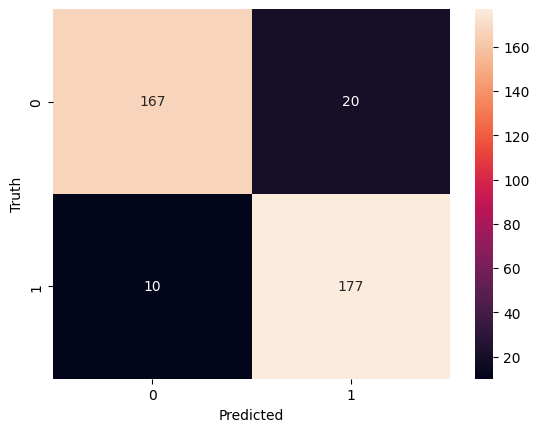

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')